1. Kütüphaneleri yükleyelim.

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, Activation, Conv2D
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,auc
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

2. Veri setini yükleyelim

In [ ]:
cifar10=tf.keras.datasets.cifar10

In [19]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape
# 50000 tane eğitim, 10000 tane test görüntümüz var
# Veriler 32*32 boyutunda ve 3 renk kanalına sahip

(50000, 32, 32, 3)

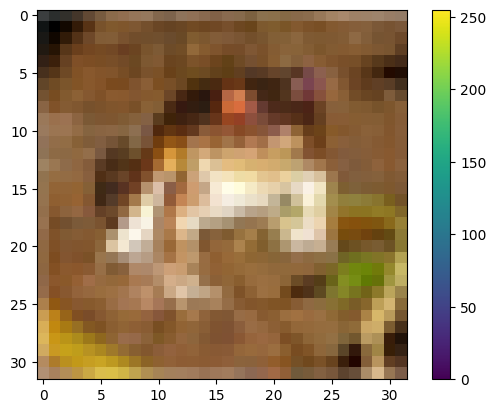

In [21]:
# Verileri görselleştirelim(rastgele)
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

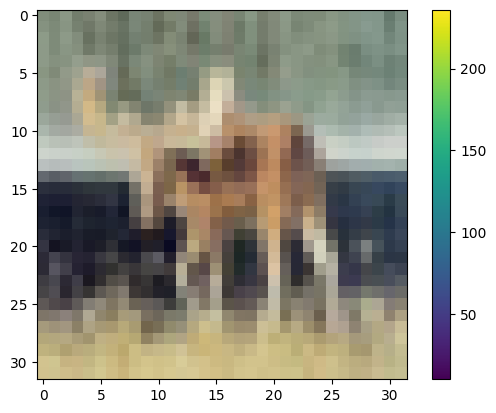

In [20]:
# Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[28])
plt.colorbar()
plt.grid(False)
plt.show()

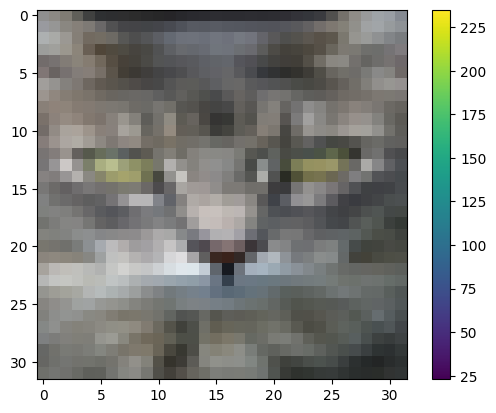

In [22]:
# Verileri görselleştirelim(rastgele)

plt.figure()
plt.imshow(X_train[8000])
plt.colorbar()
plt.grid(False)
plt.show()

3. Verileri normalleştirelim.

In [29]:
#Bu değerleri 0 ile 1 arasında bir değere düşürmemiz gerekiyor. Bu, modelimizin trendleri kolayca takip etmesini ve verimli eğitim almasını sağlar. Bunu basitçe tüm piksel değerlerini 255,0'a bölerek yapabiliriz.

X_train, X_test = X_train / 255.0, X_test / 255.0

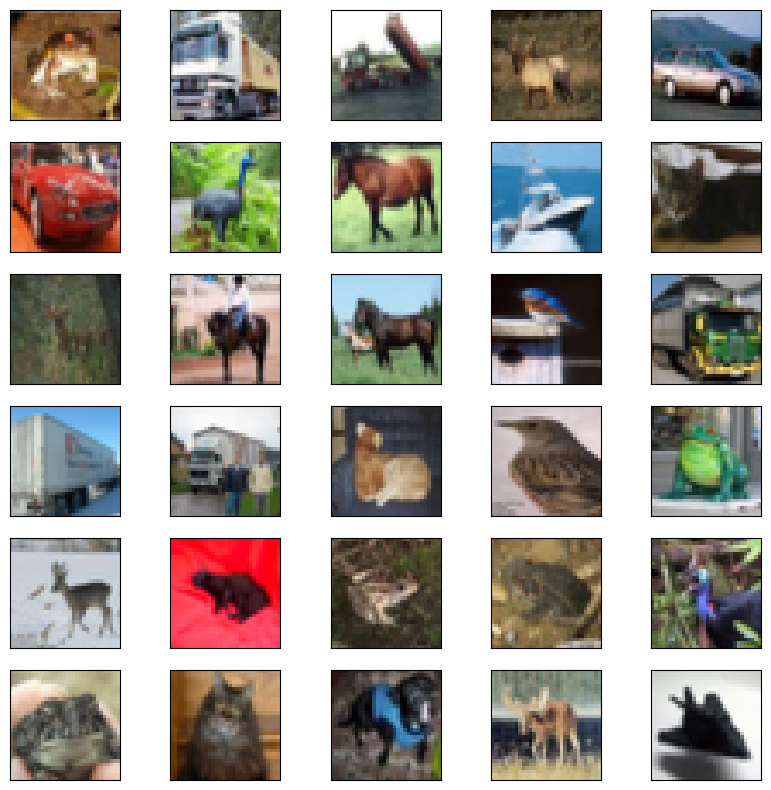

In [30]:
# 30 görüntüyü görselleştirelim

plt.figure(figsize=(10,10))

for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

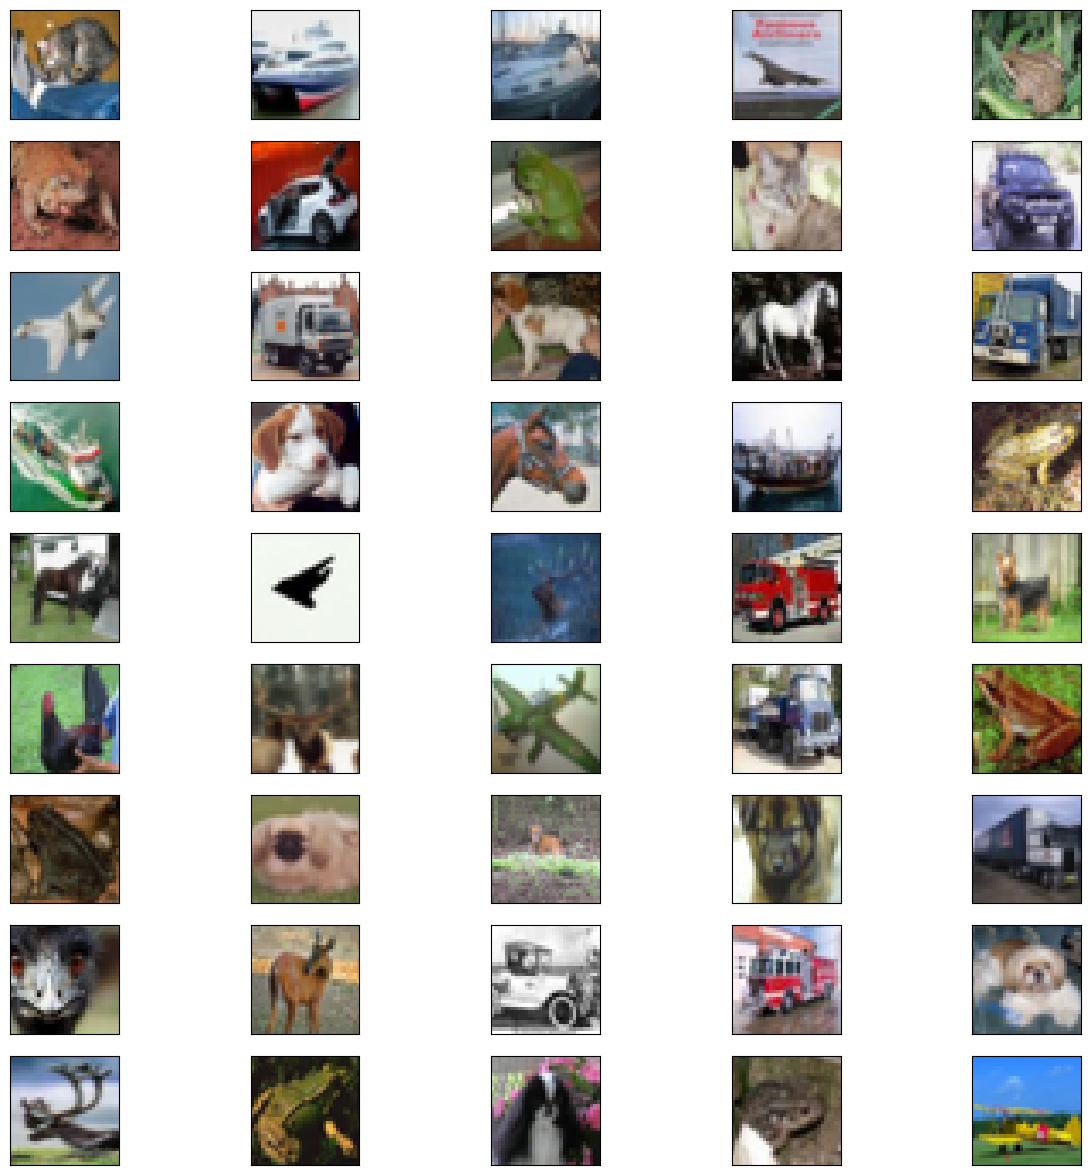

In [31]:
# 30 görüntüyü görselleştirelim

plt.figure(figsize=(15,15))
for i in range(45):
    plt.subplot(9,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()

4. Makine Öğrenmesi Modeli Oluşturma

In [32]:
X_train.shape[0]


50000

In [33]:
# Verileri 32x32 görüntü formatından 1024 özellikli vektörlere düzleştirelim
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [34]:
# x_train.shape[0] veri setindeki örnek sayısı,
# Makine Öğrenmesi modelleri verileri tek boyutlu vektörler olarak alır. 32*32 boyutundaki görüntü 1024 özellikli vektöre dönüştürülür.
# Burdaki -1 kalan boyutu otomotik olarak hesaplar, istersek şu şekilde yapabilirdik; (ikisi aynı sonucu verir)

#x_train = x_train.reshape(x_train.shape[0], 32 * 32)
#x_train.reshape(60000,1024)
#x_test = x_test.reshape(x_test.shape[0], 32 * 32)

In [35]:
#?KNeighborsClassifier

In [36]:
# KNN modeli
knn=KNeighborsClassifier().fit(X_train,y_train)

In [37]:
y_pred=knn.predict(X_test)

acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
acc

0.3398

In [ ]:
f1

0.3260170986061005

In [ ]:
recall

0.3398

In [ ]:
precision

0.4304261825528496

In [ ]:
# Karmaşıklık matrisi

cm = confusion_matrix(y_test, y_pred)
cm


array([[537,   4, 117,  13,  59,   7,  26,   5, 225,   7],
       [139, 205, 110,  42, 155,  36,  61,  10, 217,  25],
       [107,   3, 452,  52, 226,  34,  66,   8,  49,   3],
       [ 70,   8, 234, 217, 193, 115,  95,  17,  46,   5],
       [ 64,   1, 262,  35, 514,  21,  41,   7,  53,   2],
       [ 71,   3, 227, 155, 187, 220,  66,  14,  51,   6],
       [ 27,   2, 273,  68, 314,  37, 248,   2,  28,   1],
       [ 93,  10, 181,  50, 280,  52,  53, 210,  67,   4],
       [141,  14,  52,  38,  54,  16,  14,   8, 655,   8],
       [153,  67,  98,  68, 124,  23,  46,  29, 252, 140]])

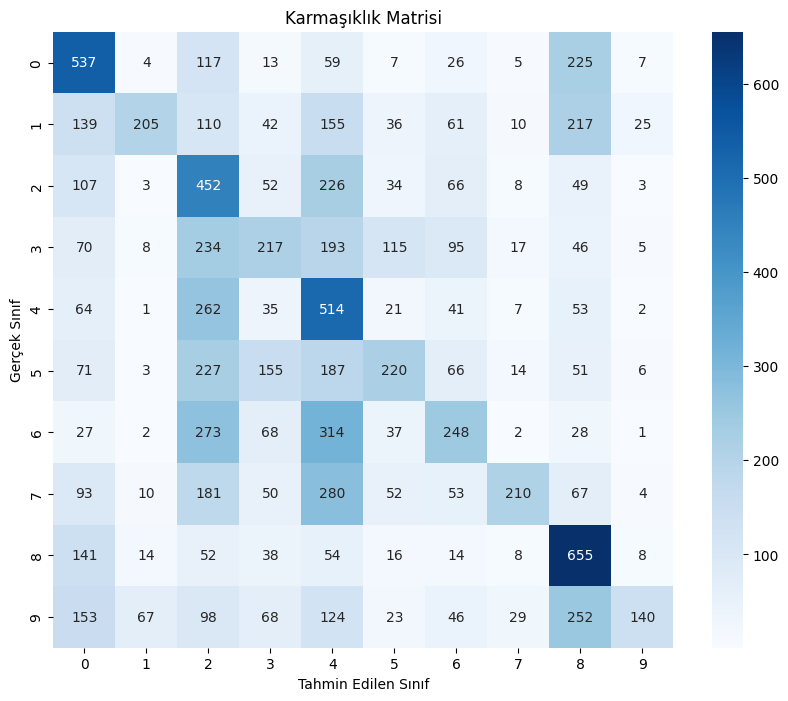

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
# Random Forest oluştur
rf=RandomForestClassifier().fit(X_train,y_train)

In [ ]:
y_pred=rf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.4651
F1 Skoru: 0.4614
Geri Çağırma (Recall): 0.4651
Kesinlik (Precision): 0.4608


In [ ]:
# Karmaşıklık matrisi
cm = confusion_matrix(y_test, y_pred)
cm

array([[560,  35,  60,  18,  29,  23,  22,  24, 167,  62],
       [ 31, 543,  21,  45,  14,  30,  35,  30,  64, 187],
       [ 93,  39, 336,  75, 145,  64, 117,  63,  40,  28],
       [ 56,  40,  75, 276,  84, 173, 139,  67,  23,  67],
       [ 55,  22, 141,  56, 385,  46, 154,  94,  27,  20],
       [ 32,  30,  92, 148,  76, 391,  90,  79,  28,  34],
       [ 11,  38,  92,  66, 114,  55, 552,  20,  10,  42],
       [ 44,  41,  51,  54, 101,  95,  41, 447,  25, 101],
       [ 87,  88,  22,  29,  21,  34,  10,  20, 606,  83],
       [ 43, 161,  13,  38,  19,  21,  28,  37,  85, 555]])

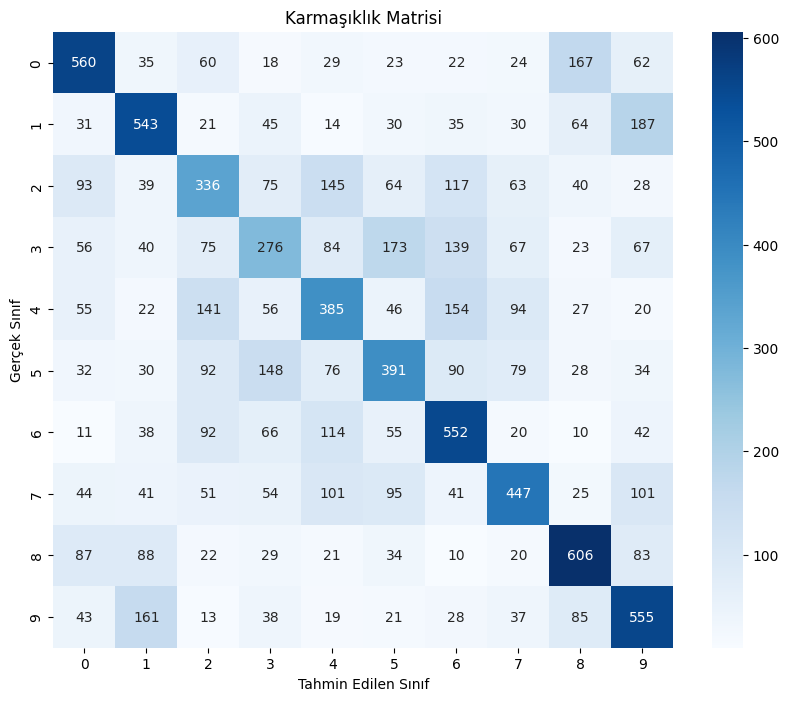

In [ ]:
# görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True,fmt="d", cmap="Blues", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

In [ ]:
# Karar Ağacı oluştur
#?DecisionTreeClassifier
dt=DecisionTreeClassifier().fit(X_train,y_train)

In [ ]:
y_pred=dt.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='weighted')
recall=recall_score(y_test,y_pred, average='weighted')
precision=precision_score(y_test,y_pred, average='weighted')

In [ ]:
print(f'Doğruluk (Accuracy): {acc:.4f}')
print(f'F1 Skoru: {f1:.4f}')
print(f'Geri Çağırma (Recall): {recall:.4f}')
print(f'Kesinlik (Precision): {precision:.4f}')

Doğruluk (Accuracy): 0.2703
F1 Skoru: 0.2702
Geri Çağırma (Recall): 0.2703
Kesinlik (Precision): 0.2703


5. Yapay Sinir Ağı

In [60]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [61]:
y_train.shape

(50000, 1)

In [62]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [63]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [64]:
y_test = y_test.reshape(-1,)

In [65]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [66]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

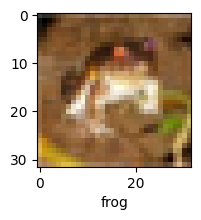

In [67]:
plot_sample(X_train, y_train, 0)

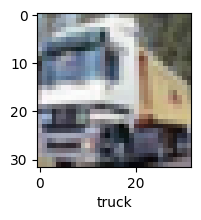

In [68]:
plot_sample(X_train, y_train, 1)

In [76]:
X_train = X_train.reshape(-1, 32, 32, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32, 32, 1).astype('float32') / 255.0

In [78]:
## classlar için one hot encoding işlemi yapalım


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),


    tf.keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 1024)              0         
                                                                 
 dense_33 (Dense)            (None, 4)                 4100      
                                                                 
 dense_34 (Dense)            (None, 8)                 40        
                                                                 
 dense_35 (Dense)            (None, 10)                90        
                                                                 
Total params: 4230 (16.52 KB)
Trainable params: 4230 (16.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 8192)              0         
                                                                 
 dense_43 (Dense)            (None, 10)                81930     
                                                                 
Total params: 82826 (323.54 KB)
Trainable params: 82826 (323.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


6. Evrişimli Sinir Ağı (CNN)

# Modeli eğitmek için Evrişim Sinir Ağı(CNN) kullanacağız. Conv2d katmanı olan bir evrişim katmanının yanı sıra havuzlama ve normalleştirme yöntemlerini kullanacağız. 'Relu' aktivasyon fonksiyonunu ve çıkış katmanı için “softmax” fonksiyonunu kullanıyoruz.

In [46]:
y_train, y_test = y_train.flatten(), y_test.flatten()
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16,

In [47]:
# sınıf sayısı
K = len(set(y_train))

# toplam sınıf sayısı hesaplayalım
# çıkış katmanı
print("number of classes:", K)

# fonksiyonel API ile model oluşturalım
# giriş katmanı
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# gizli katman
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# sonuncu gizli katman i.e..
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model sonucu
model.summary()


number of classes: 10
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1

In [48]:
# derleme
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


In [54]:
# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=23)

Epoch 1/23
1563/1563 [==============================] - 16s 10ms/step - loss: 0.0740 - accuracy: 0.9758 - val_loss: 0.8565 - val_accuracy: 0.8248
Epoch 2/23
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0667 - accuracy: 0.9789 - val_loss: 0.7865 - val_accuracy: 0.8363
Epoch 3/23
1563/1563 [==============================] - 15s 9ms/step - loss: 0.0597 - accuracy: 0.9807 - val_loss: 0.8653 - val_accuracy: 0.8346
Epoch 4/23
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.8065 - val_accuracy: 0.8385
Epoch 5/23
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0569 - accuracy: 0.9812 - val_loss: 0.8594 - val_accuracy: 0.8315
Epoch 6/23
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0624 - accuracy: 0.9801 - val_loss: 0.7935 - val_accuracy: 0.8374
Epoch 7/23
1563/1563 [==============================] - 14s 9ms/step - loss: 0.0600 - accuracy: 0.9804 - val_loss: 0.8759 - val_a

In [56]:
# model.fit()'i tanımladıktan sonra çalıştırdığımızda eğitime kaldığı yerden devam etmeye başlar.
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=10)


Epoch 1/10
1562/1562 [==============================] - 42s 27ms/step - loss: 0.4036 - accuracy: 0.8666 - val_loss: 0.4773 - val_accuracy: 0.8485
Epoch 2/10
1562/1562 [==============================] - 40s 26ms/step - loss: 0.3828 - accuracy: 0.8718 - val_loss: 0.4423 - val_accuracy: 0.8569
Epoch 3/10
1562/1562 [==============================] - 40s 26ms/step - loss: 0.3693 - accuracy: 0.8775 - val_loss: 0.4972 - val_accuracy: 0.8430
Epoch 4/10
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3546 - accuracy: 0.8792 - val_loss: 0.5029 - val_accuracy: 0.8383
Epoch 5/10
1562/1562 [==============================] - 41s 26ms/step - loss: 0.3451 - accuracy: 0.8858 - val_loss: 0.4733 - val_accuracy: 0.8496
Epoch 6/10
1562/1562 [==============================] - 40s 26ms/step - loss: 0.3265 - accuracy: 0.8898 - val_loss: 0.4589 - val_accuracy: 0.8546
Epoch 7/10
1562/1562 [==============================] - 40s 26ms/step - loss: 0.3198 - accuracy: 0.8912 - val_loss: 0.4336 -

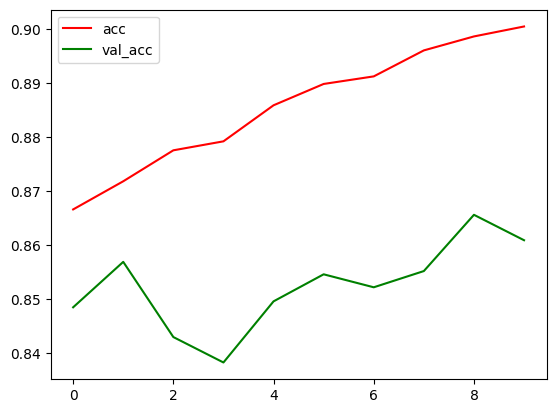

In [57]:
# Yineleme başına doğruluk
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


1/1 [==============================] - 1s 632ms/step
Original label is cat and predicted label is cat


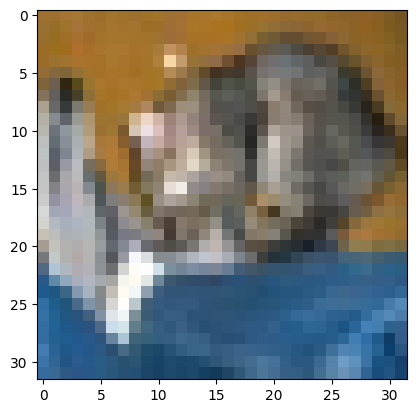

In [58]:
# sınıfları eşleme

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# veri setinden resim seçelim
image_number = 0

# resmi göster
plt.imshow(x_test[image_number])

# resimleri sırayla yükle
n = np.array(x_test[image_number])

# yeniden şekillendir
p = n.reshape(1, 32, 32, 3)

# tahmin için ağa gönder
# tahmin edilen sınıflandırmayı kaydet
predicted_label = labels[model.predict(p).argmax()]

# orijinal sınıflandırmayı yükle
original_label = labels[y_test[image_number]]

# sonucu göster
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


plot_sample(X_test, y_test,3)